In [13]:
#Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## DATA AQUISITION ##
# Load the different SuperBowl and related CSV data into DataFrames.
super_bowl = pd.read_csv("super_bowls.csv")
tv_df = pd.read_csv("tv.csv")
hf_music = pd.read_csv("halftime_musicians.csv")

#Display each dataset to get an idea of the data.
super_bowl.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [14]:
tv_df.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [15]:
hf_music.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [16]:
#Check each dataset for missing values and range.

super_bowl.info()
#The SuperBowl dataset seems to be missing only the backup Quarterback column (since only one Quarterback usually plays the entire game).

print('\n')
tv_df.info()
print('\n')
hf_music.info()

#The TV Ratings and Musicians dataset has a few null values but that is expected since the dataset starts from 1967.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
date              52 non-null object
super_bowl        52 non-null int64
venue             52 non-null object
city              52 non-null object
state             52 non-null object
attendance        52 non-null int64
team_winner       52 non-null object
winning_pts       52 non-null int64
qb_winner_1       52 non-null object
qb_winner_2       2 non-null object
coach_winner      52 non-null object
team_loser        52 non-null object
losing_pts        52 non-null int64
qb_loser_1        52 non-null object
qb_loser_2        3 non-null object
coach_loser       52 non-null object
combined_pts      52 non-null int64
difference_pts    52 non-null int64
dtypes: int64(6), object(12)
memory usage: 7.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_

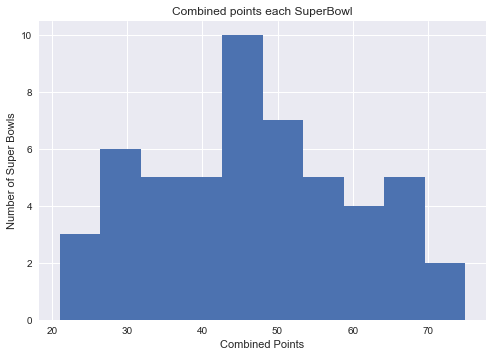

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [17]:
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points.
plt.hist(super_bowl.combined_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.title('Combined points each SuperBowl')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores.
display(super_bowl[super_bowl['combined_pts'] > 70])
display(super_bowl[super_bowl['combined_pts'] < 25])

#The 2018 and 1995 SuperBowls had the most combined points from each team and possibly were the most exciting ones to watch!

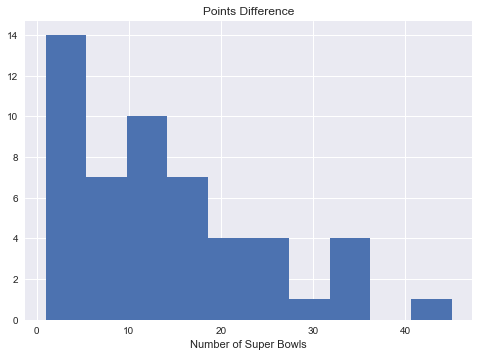

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [18]:
# Plot a histogram of point differences to find the most interesting matches.
plt.hist(super_bowl.difference_pts)
plt.xlabel('Point Difference')
plt.xlabel('Number of Super Bowls')
plt.title('Points Difference')
plt.show()

# Display the closest game(s) and biggest blowouts.
display(super_bowl[super_bowl['difference_pts'] == 1])
display(super_bowl[super_bowl['difference_pts'] >= 35])

#1991 Superbowl 25 had the least point difference whereas there are a few which have points difference greater than 35 as well.

In [19]:
#Joining the SuperBowl and TV Datasets based on SuperBowl number to find if Huge Points Difference translated to lost viewers.
#Filtering out SuperBowl 1 because it was split over two networks.
games_tv = pd.merge(tv_df[tv_df['super_bowl'] > 1], super_bowl, on='super_bowl')
games_tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000,2018-02-04,...,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000,2017-02-05,...,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000,2016-02-07,...,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000,2015-02-01,...,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000,2014-02-02,...,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


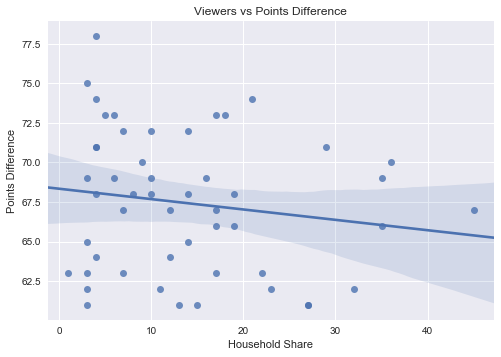

In [20]:
# Create a scatter plot with a linear regression model fit.
sns.regplot(x='difference_pts', y='share_household' , data=games_tv)
plt.ylabel('Points Difference')
plt.xlabel('Household Share')
plt.title('Viewers vs Points Difference')
plt.show()

#Huge Blowouts(Points Difference between the teams) actually does translate to a loss of viewers since the game is not as interesting!

In [21]:
def func(row):
    return row['rating_household']+row['share_household']    #---> Task - Using apply function to find the total rating for each SuperBowl

games_tv['total_rating'] = games_tv.apply(func,axis = 1)
games_tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,total_rating
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000,2018-02-04,...,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,111.1
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000,2017-02-05,...,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,118.3
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000,2016-02-07,...,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,118.6
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000,2015-02-01,...,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4,118.5
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000,2014-02-02,...,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35,115.7


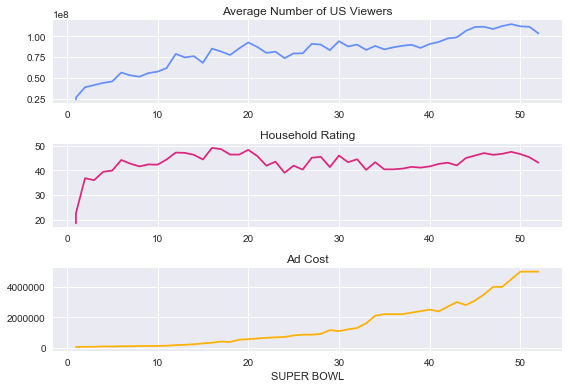

In [22]:
# Viewership and the ad industry over time visualizations.
# Create a figure with 3x1 subplot and activate the top subplot.
plt.subplot(3, 1, 1)
plt.plot(tv_df.super_bowl, tv_df.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot.
plt.subplot(3, 1, 2)
plt.plot(tv_df.super_bowl, tv_df.rating_household, color='#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot.
plt.subplot(3, 1, 3)
plt.plot(tv_df.super_bowl, tv_df.ad_cost, color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots.
plt.tight_layout()

In [23]:
#Now let us move on to the Half-Time Musicians dataset to see what insights we can get from those!
# Counting halftime show appearances for each musician and sort them from most to least
halftime_appearances = hf_music.groupby('musician').count()['super_bowl'].reset_index()   #-Task - using GroupBy
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

#Grambling State University Tiger Marching Band has the most appearances = 6!!

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


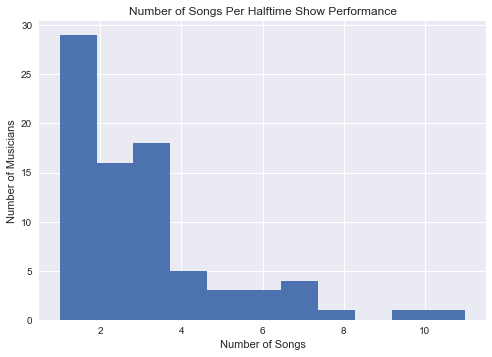

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [26]:
#Since a lot of the Marching Band rows do not have number of songs column filled, we can filter those out as most 
#of them seem to have either Marching or Spirit in their band names. 

#Function to remove rows with strings Marching and Spirit as they represent bands.
def rmv_band(df):
    df_return = df[~df.musician.str.contains('Marching')]                          
    df_return = df_return[~df_return.musician.str.contains('Spirit')]
    return df_return

no_bands = rmv_band(hf_music)

# Plotting a histogram of number of songs per performance.
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs')
plt.ylabel('Number of Musicians')
plt.title('Number of Songs Per Halftime Show Performance')
plt.show()

# Sort the non-band musicians by number of songs per appearance.
no_bands = no_bands.sort_values('num_songs', ascending=False)
# Displaying the top 15
display(no_bands.head(15))

#Justin Timberlake seems to have the most number of songs sung! (Discounting the Bands)

In [27]:
## Modeling ##

games_tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,total_rating
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000,2018-02-04,...,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8,111.1
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000,2017-02-05,...,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6,118.3
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000,2016-02-07,...,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14,118.6
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000,2015-02-01,...,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4,118.5
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000,2014-02-02,...,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35,115.7


C:\Users\siddh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\siddh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


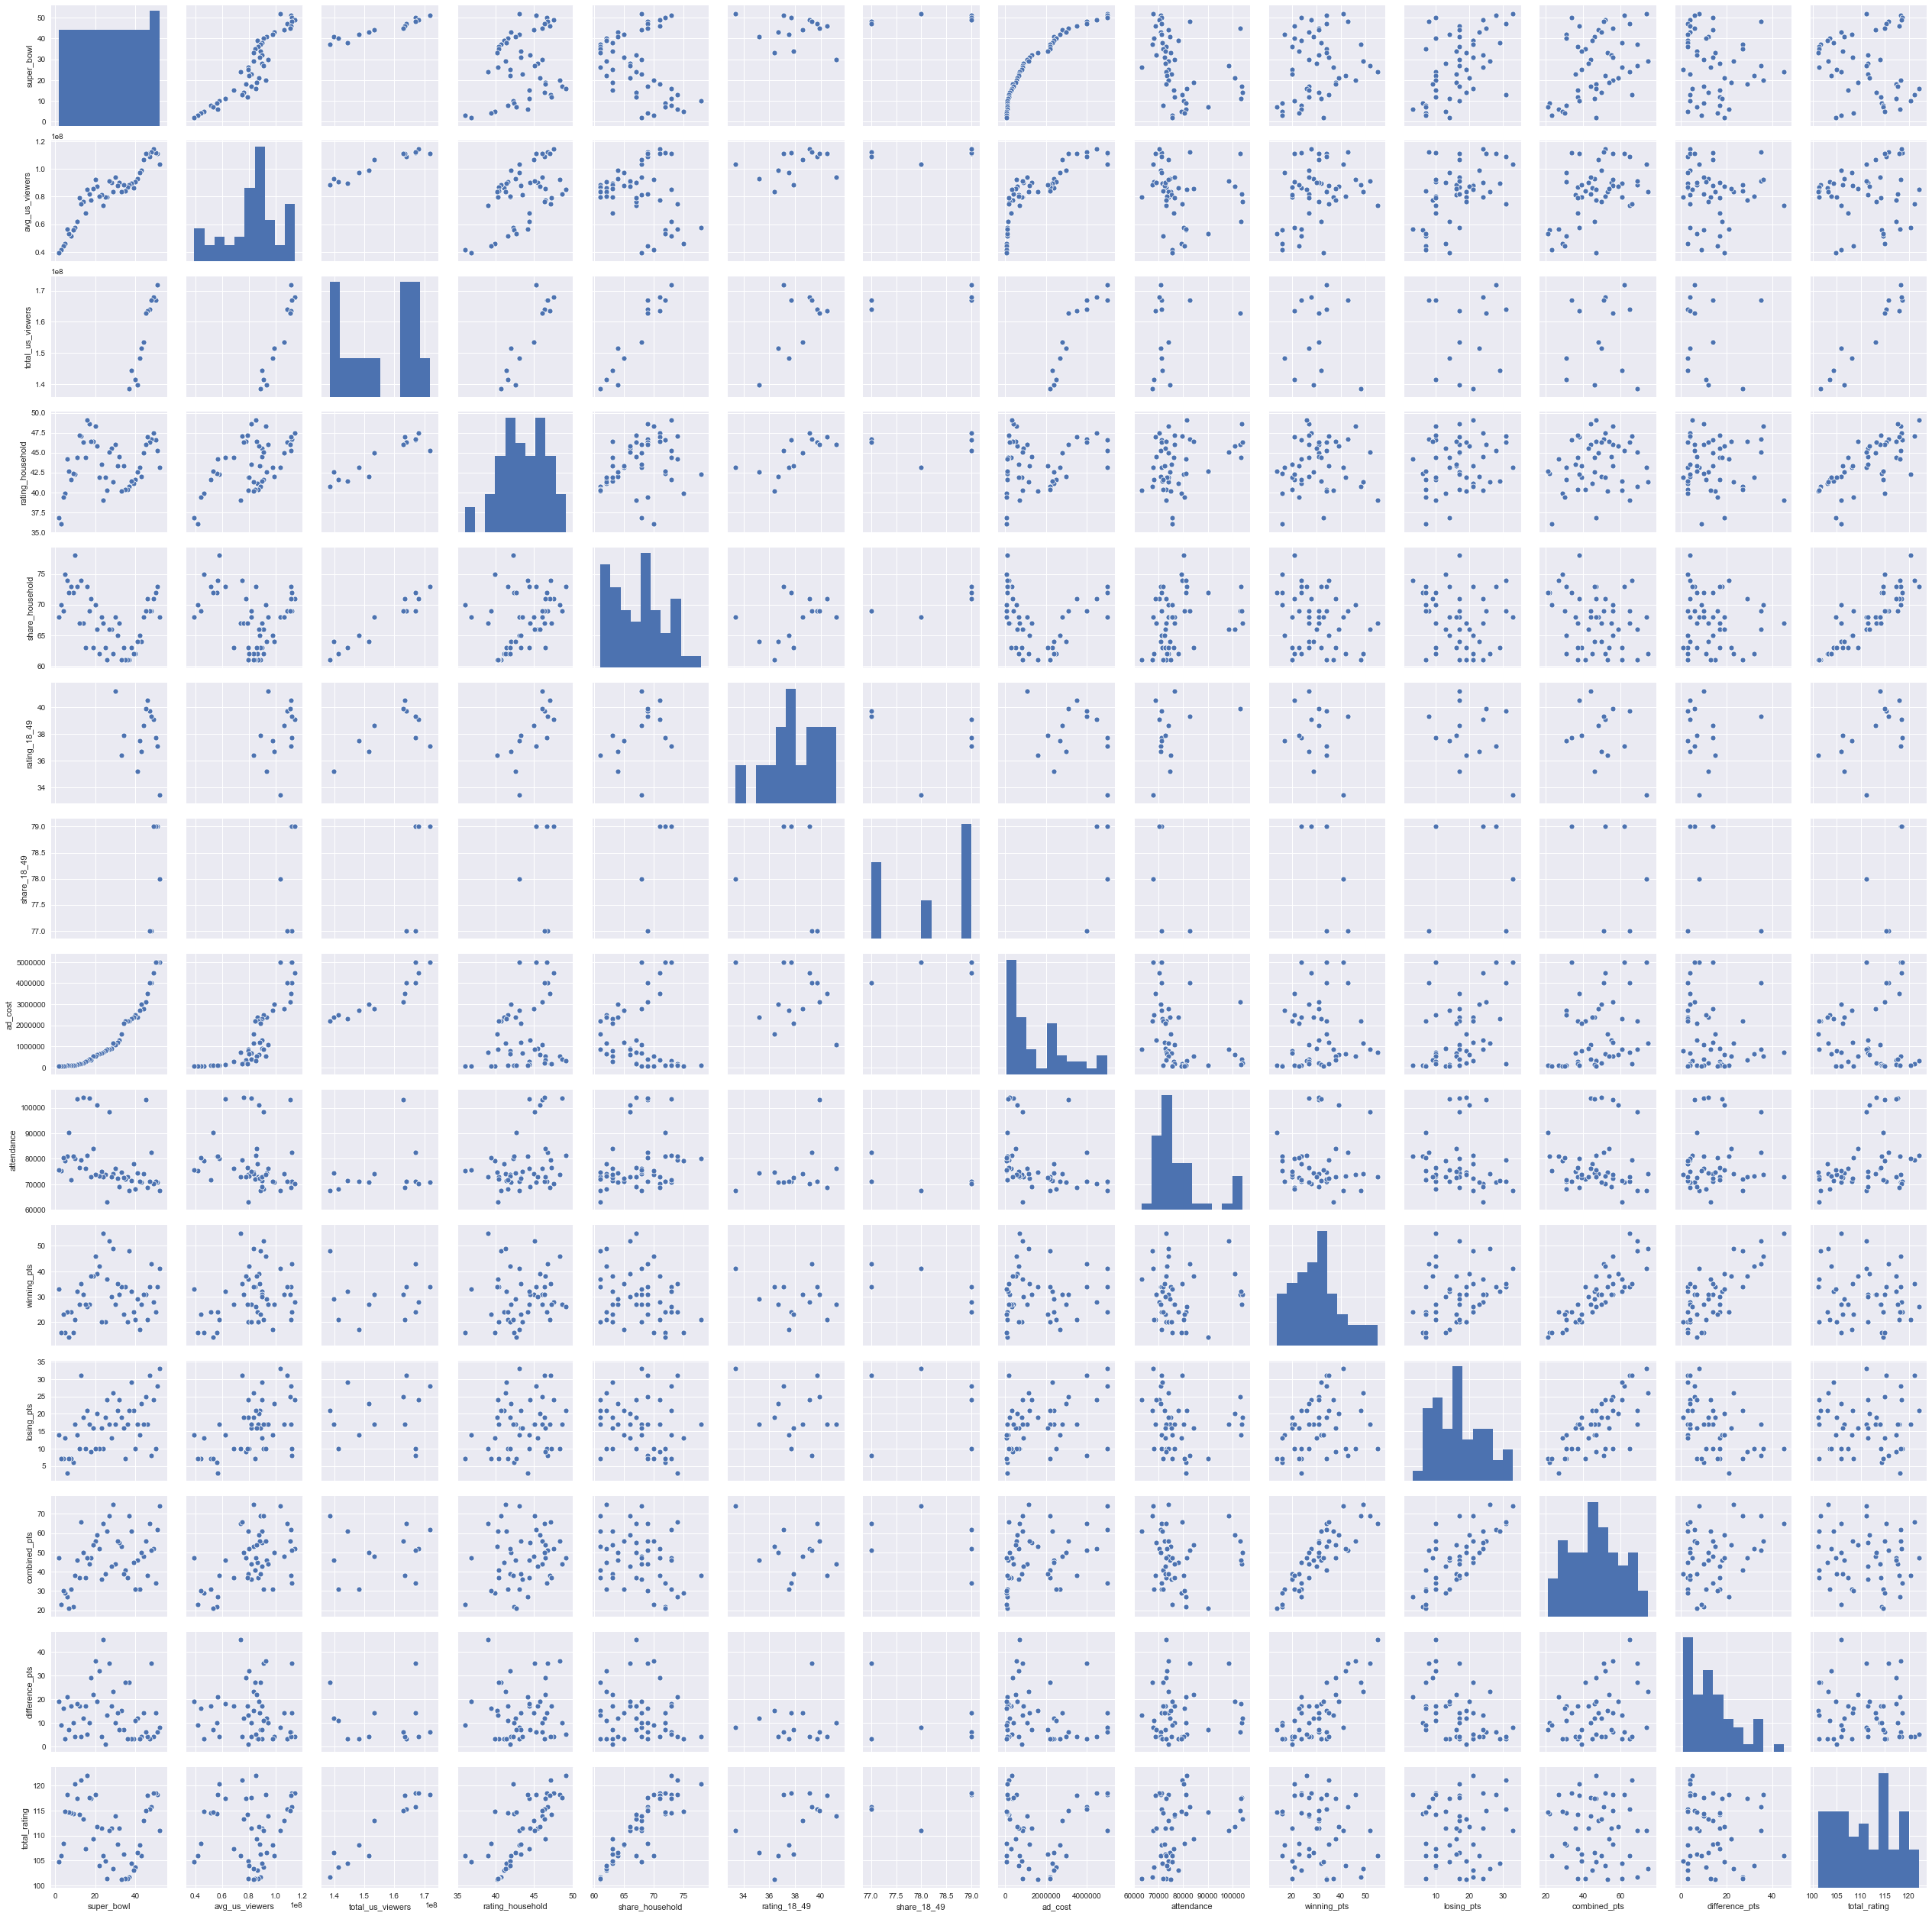

In [28]:
sns.pairplot(games_tv);

In [29]:
#Responses can be avg_us_viewers.
#Features can be rating_household, share_household, date, combined_pts, difference_pts. Categorical - team_winner, network

games_tv.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 27 columns):
super_bowl          51 non-null int64
network             51 non-null object
avg_us_viewers      51 non-null int64
total_us_viewers    14 non-null float64
rating_household    51 non-null float64
share_household     51 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             51 non-null int64
date                51 non-null object
venue               51 non-null object
city                51 non-null object
state               51 non-null object
attendance          51 non-null int64
team_winner         51 non-null object
winning_pts         51 non-null int64
qb_winner_1         51 non-null object
qb_winner_2         2 non-null object
coach_winner        51 non-null object
team_loser          51 non-null object
losing_pts          51 non-null int64
qb_loser_1          51 non-null object
qb_loser_2          3 non-null object
coach_

In [37]:
games_tv['avg_us_viewers'].mean()  #---> Finding some statistics to work with for final model.
display(games_tv['avg_us_viewers'].mode())

0    90000000
dtype: int64

In [36]:
display(games_tv['attendance'].mean())
display(games_tv['ad_cost'].median())

77760.05882352941

850000.0

In [34]:
display(games_tv['ad_cost'].median())
display(games_tv['ad_cost'].mean())

850000.0

1512269.1764705882

In [38]:
#Selecting only cateogrical variables to encode before modeling
games_cat = games_tv[['network', 'team_winner']]
from sklearn.preprocessing import OneHotEncoder
#Creating an encoder
encoder = OneHotEncoder(sparse = False)
#Fitting encoder onto categorical columns
encoder.fit(games_cat)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [39]:
#Transform the columns
games_cat_1hot = encoder.transform(games_cat)
games_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [40]:
#Convert results back to dataframe
games_cat_1hot = pd.DataFrame(games_cat_1hot, columns=encoder.get_feature_names())
games_cat_1hot

,x0_ABC,x0_CBS,x0_Fox,x0_NBC,x1_Baltimore Colts,x1_Baltimore Ravens,x1_Chicago Bears,x1_Dallas Cowboys,x1_Denver Broncos,x1_Green Bay Packers,...,x1_New York Giants,x1_New York Jets,x1_Oakland Raiders,x1_Philadelphia Eagles,x1_Pittsburgh Steelers,x1_San Francisco 49ers,x1_Seattle Seahawks,x1_St. Louis Rams,x1_Tampa Bay Buccaneers,x1_Washington Redskins
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#Responses can be avg_us_viewers.
#Features can be rating_household, share_household, *date*, combined_pts, difference_pts. Categorical - team_winner, network

## USED CATEOGRICAL VARIABLES IN MODEL BUT PREDICTION RATE REDUCED##
## SO STICKING TO NUMERIC VARIABLES TO MAKE FINAL MODEL WITH BETTER PREDICTABLITY ##

#Only keeping select variables in the final dataframe for modeling.
games_df = games_tv[['network', 'avg_us_viewers', 'rating_household', 'share_household', 'team_winner', 'combined_pts', 'difference_pts']]

#Setting the Feature variables separately. 'team_winner', 'network',
X = games_df[[ 'rating_household', 'share_household',  'combined_pts', 'difference_pts']]
X.head()

#Append back to X after dropping the columns
#X = pd.concat([X.drop(['network', 'team_winner'], axis=1), games_cat_1hot], axis=1)
#X.head()

,rating_household,share_household,combined_pts,difference_pts
0,43.1,68,74,8
1,45.3,73,62,6
2,46.6,72,34,14
3,47.5,71,52,4
4,46.7,69,51,35


In [42]:
#Setting the Response variables separately.
y = games_df['avg_us_viewers']
y.head()

0    103390000
1    111319000
2    111864000
3    114442000
4    112191000
Name: avg_us_viewers, dtype: int64

In [43]:
#Splitting the data = 75-25 split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state = 777)

In [46]:
### FINAL LINEAR AND NON_LINEAR REGRESSION MODELS ##

#We need a regression model since the dep_delay values are continuous hence import all Regression models
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Create classes for each model.
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=777)
Dtc = DecisionTreeRegressor(random_state = 777)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=777)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=777)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=777)

In [48]:
#Running a loop for each model to find mean squared erros, R2 and prediction level of each to compare.
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid], 
     ['Lasso','Linear Regression','Ridge','Decision Tree Regressor','Random Forest Regressor', 'Boosted Linear', 'Boosted Lasso', 'Boosted Ridge']):
    model1 = model.fit(Xtrain,ytrain)
    Ypredict=model1.predict(Xtest)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(ytest, Ypredict))  
    print('Mean Squared Error:', mean_squared_error(ytest, Ypredict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, Ypredict)))
    print('R2 : ',r2_score(ytest, Ypredict))
    print()

Lasso
Mean Absolute Error: 8866640.837688316
Mean Squared Error: 112961394601050.44
Root Mean Squared Error: 10628329.812395288
R2 :  0.6656152380021465

Linear Regression
Mean Absolute Error: 8866640.861900302
Mean Squared Error: 112961396682024.14
Root Mean Squared Error: 10628329.91029278
R2 :  0.6656152318421137

Ridge
Mean Absolute Error: 8857847.796736695
Mean Squared Error: 112630177998808.66
Root Mean Squared Error: 10612736.593301874
R2 :  0.666595694954732

Decision Tree Regressor
Mean Absolute Error: 8984076.923076924
Mean Squared Error: 142026552692307.7
Root Mean Squared Error: 11917489.361954879
R2 :  0.5795774725770667

Random Forest Regressor
Mean Absolute Error: 7365300.0
Mean Squared Error: 89858584820769.23
Root Mean Squared Error: 9479376.816055432
R2 :  0.7340034477719042

Boosted Linear
Mean Absolute Error: 9262287.567073045
Mean Squared Error: 120105425497888.42
Root Mean Squared Error: 10959262.087288925
R2 :  0.6444677027793273

Boosted Lasso
Mean Absolute Erro